## GrabCut then detect cat face

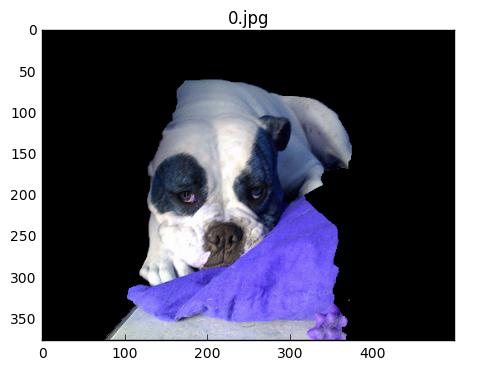

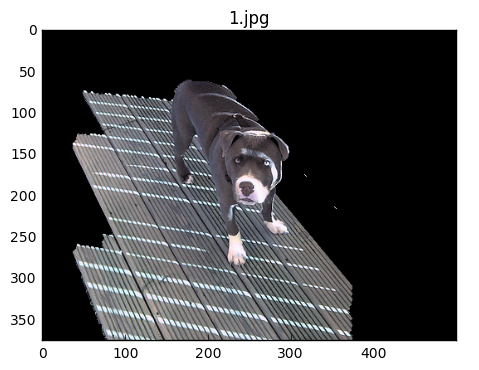

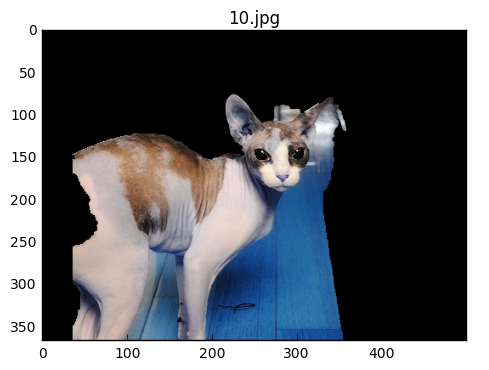

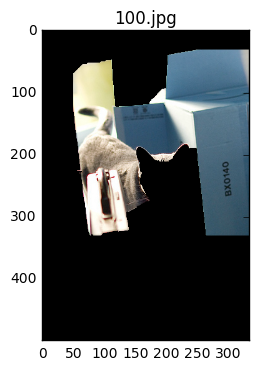

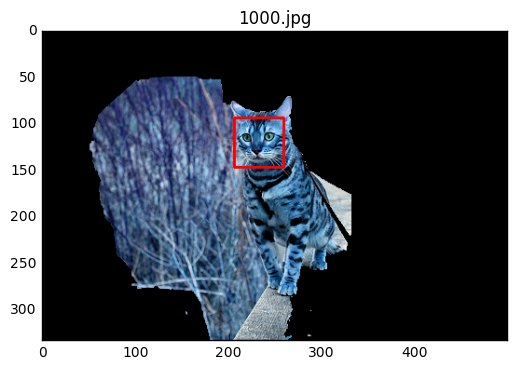

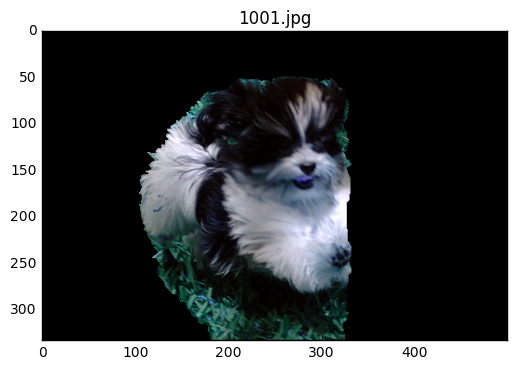

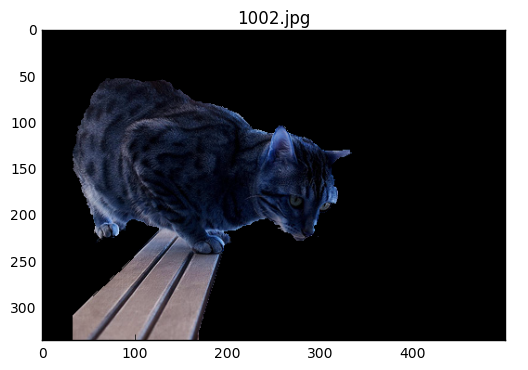

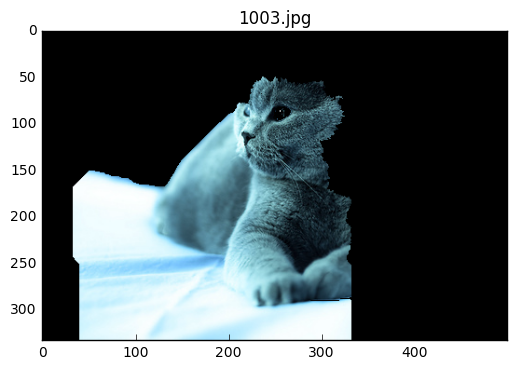

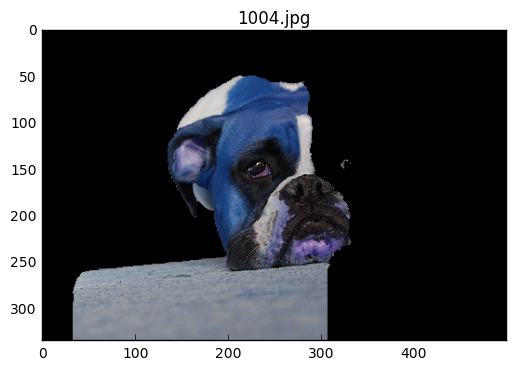

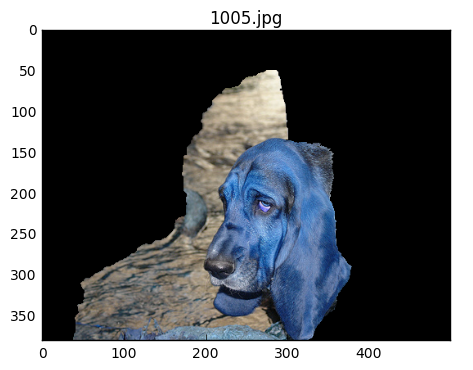

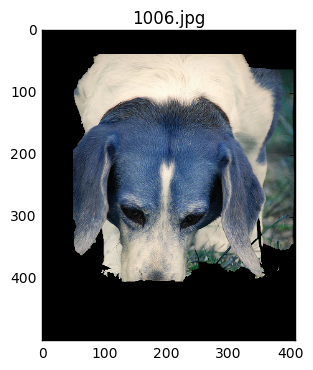

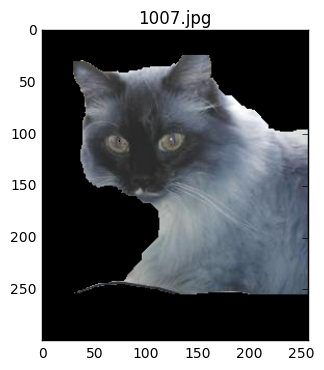

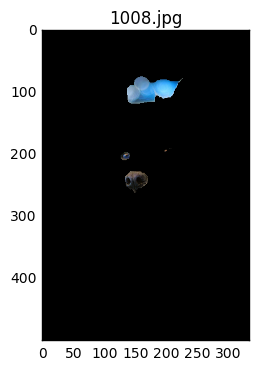

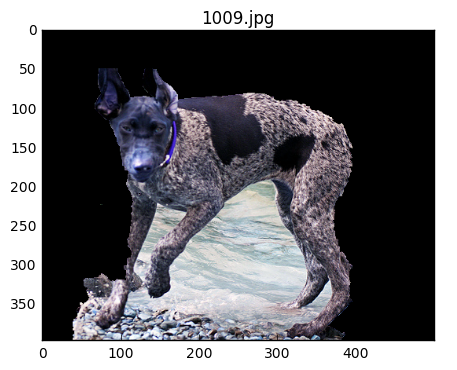

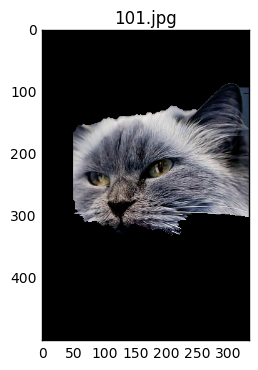

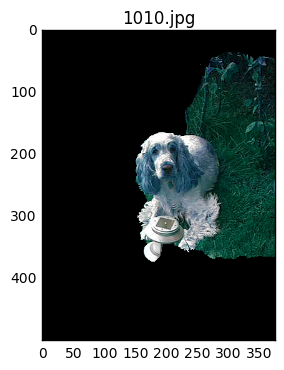

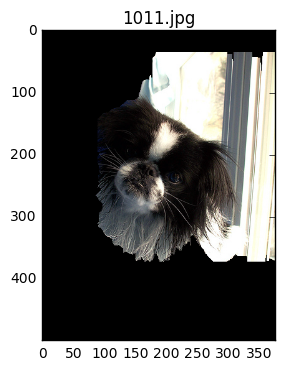

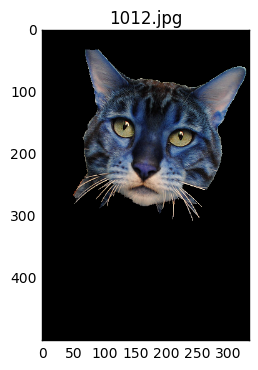

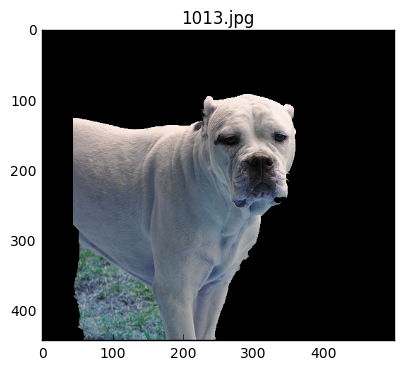

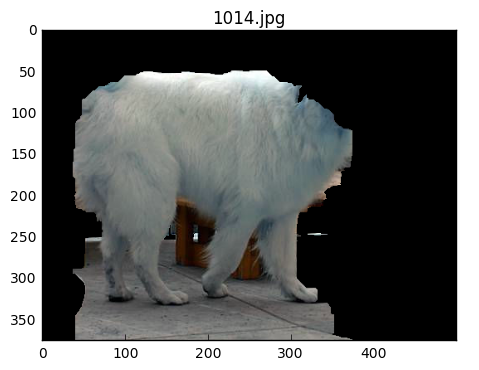

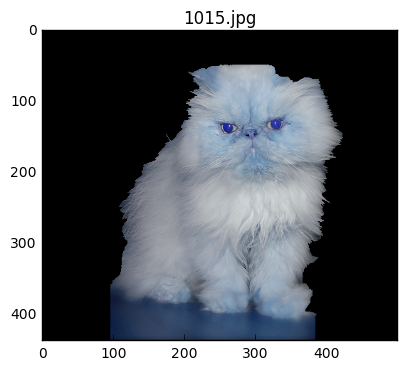

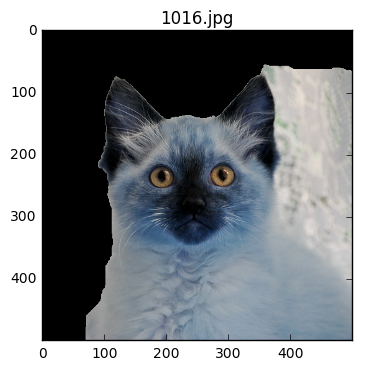

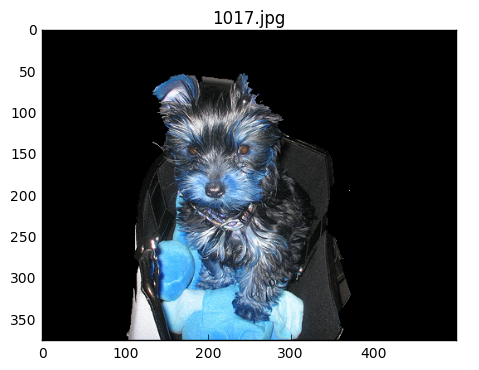

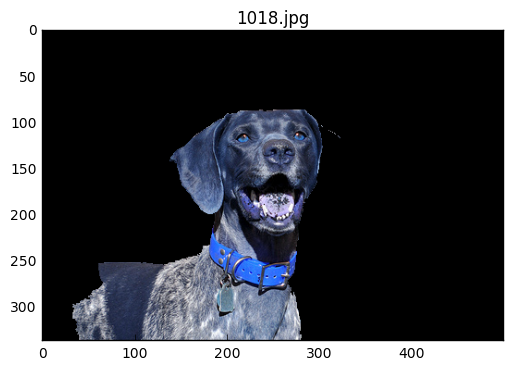

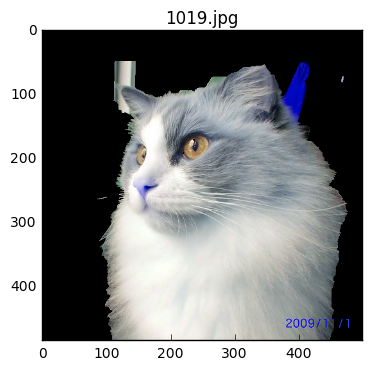

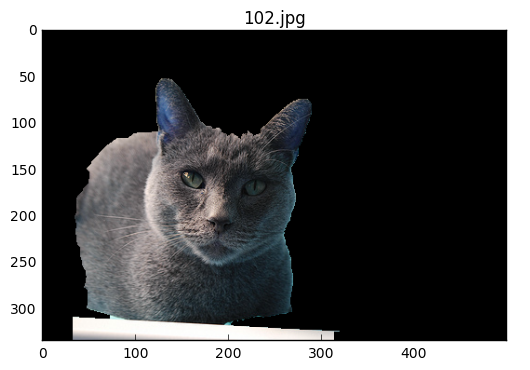

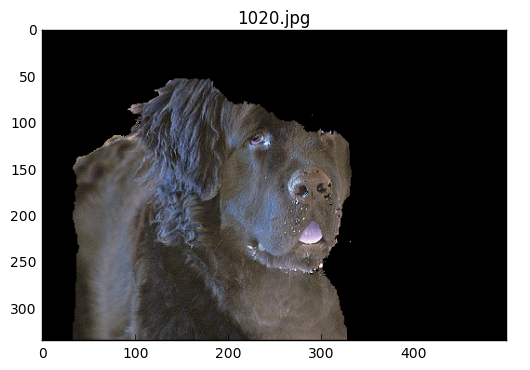

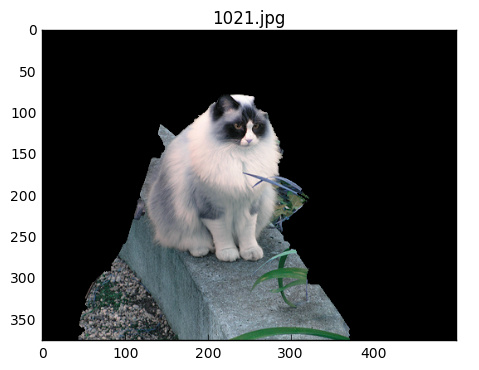

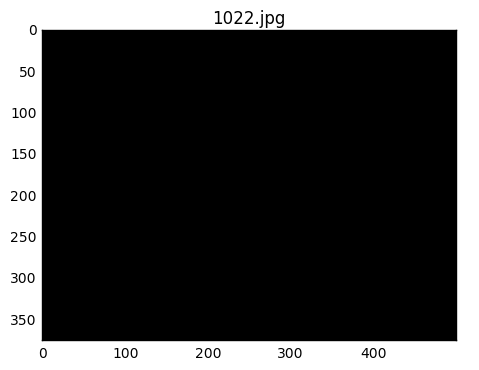

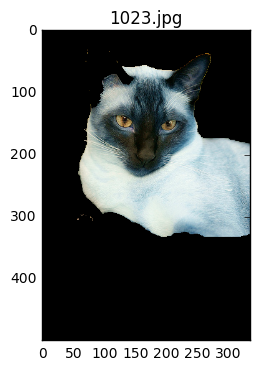

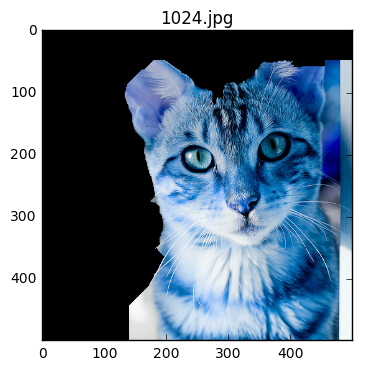

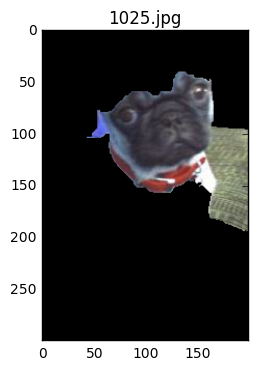

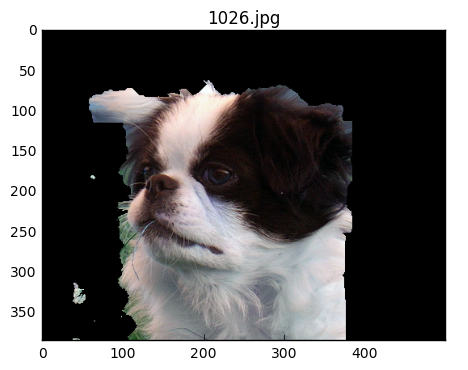

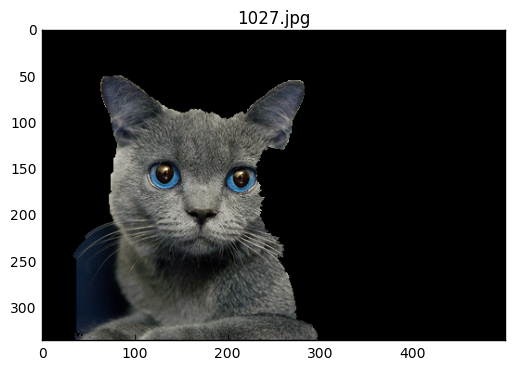

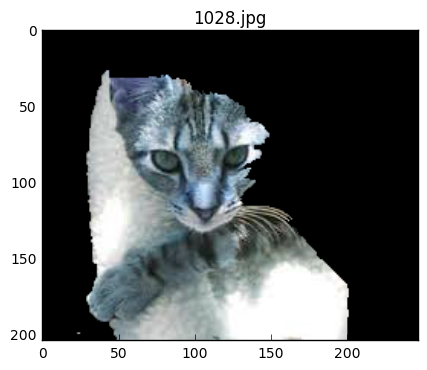

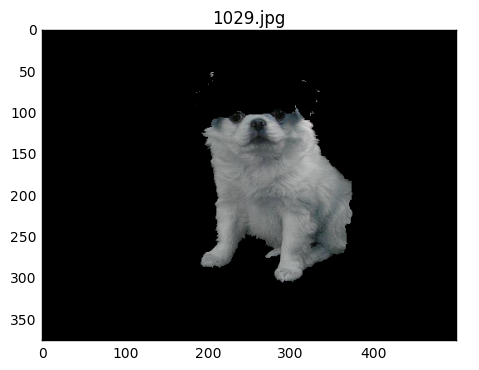

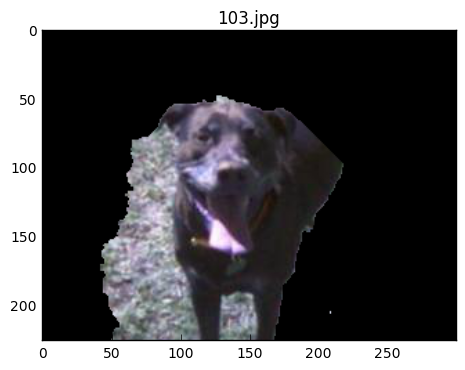

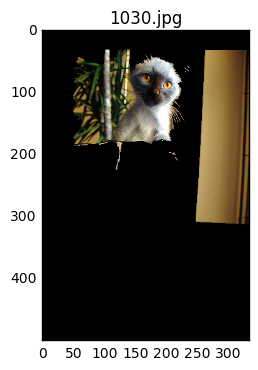

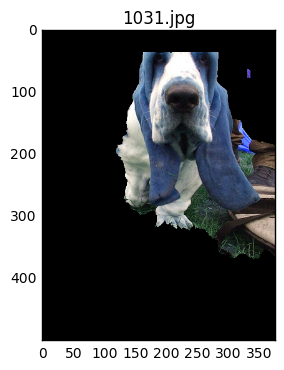

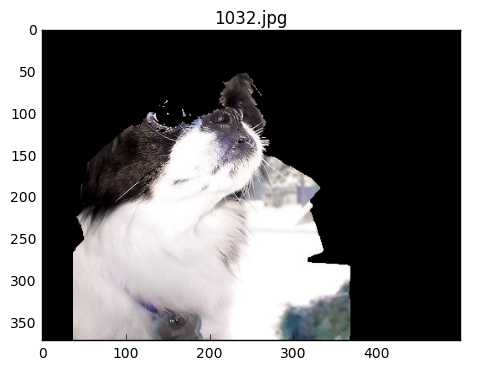

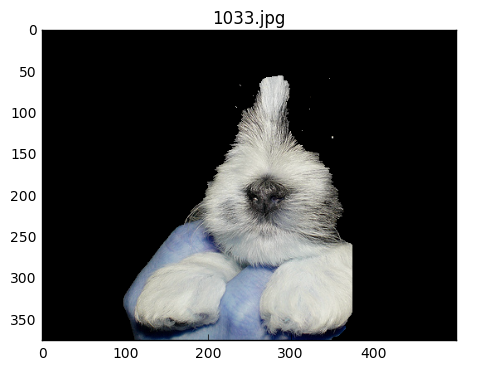

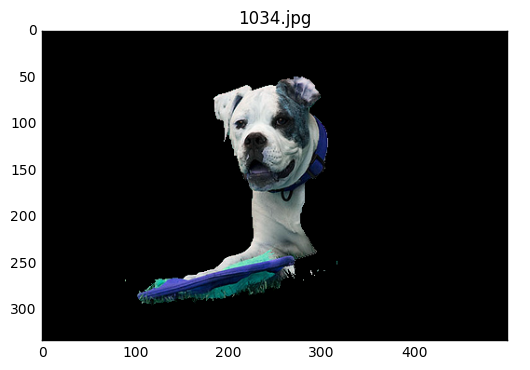

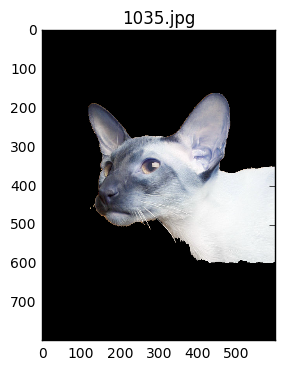

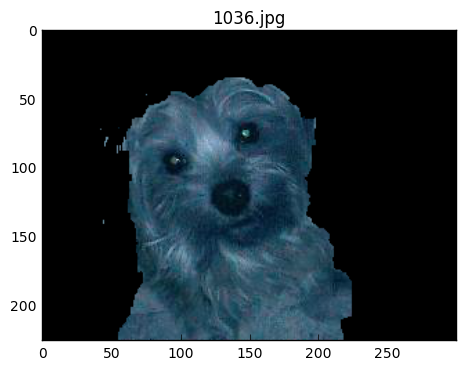

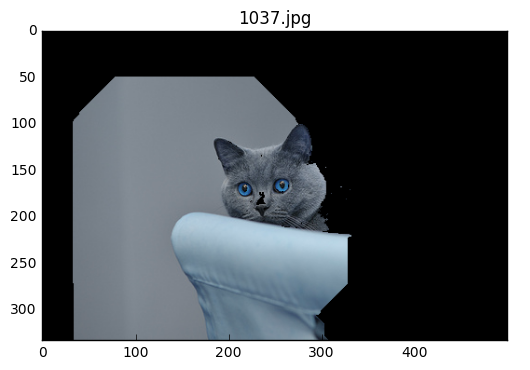

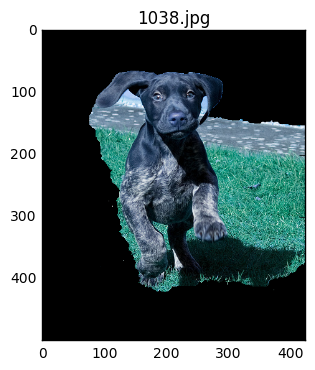

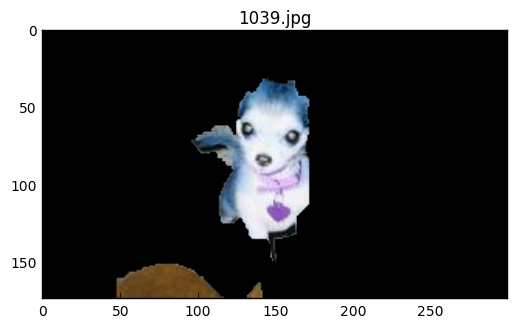

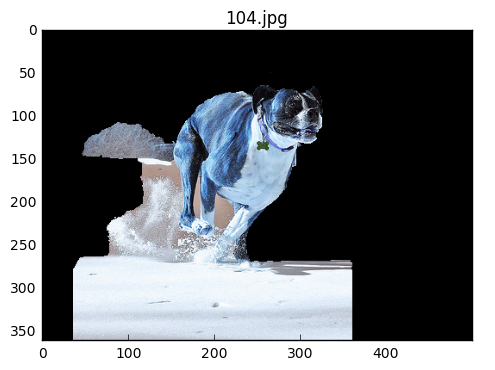

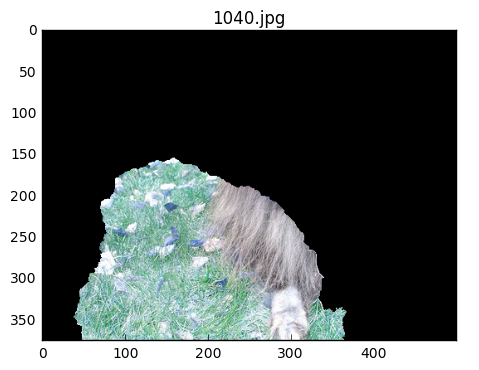

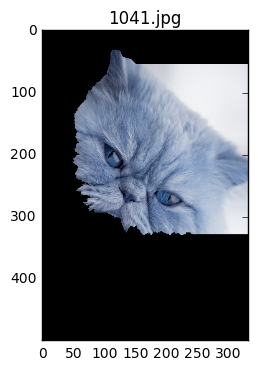

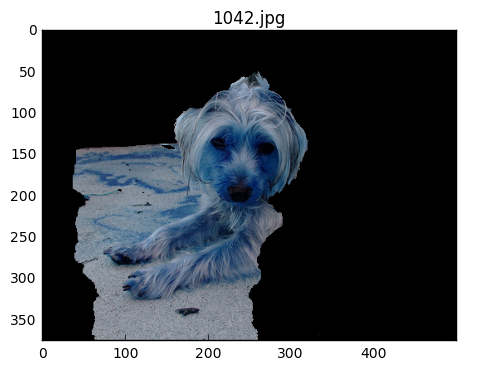

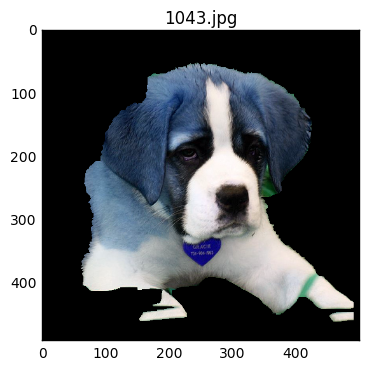

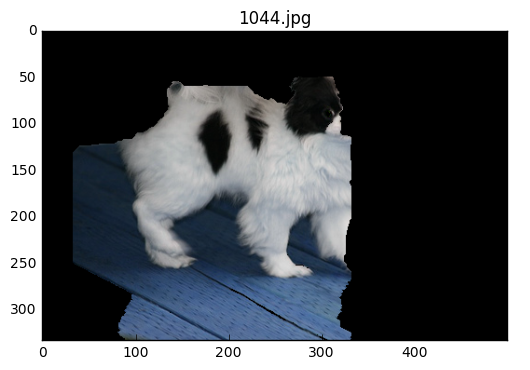

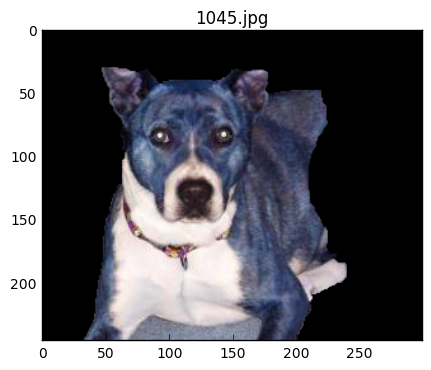

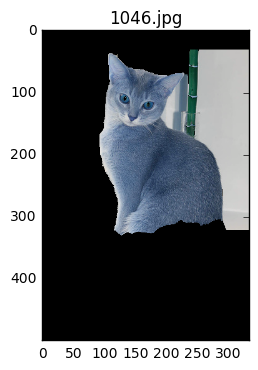

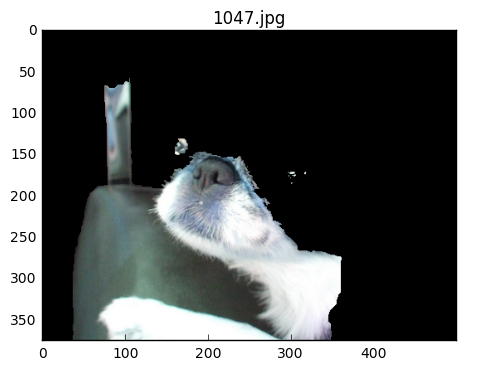

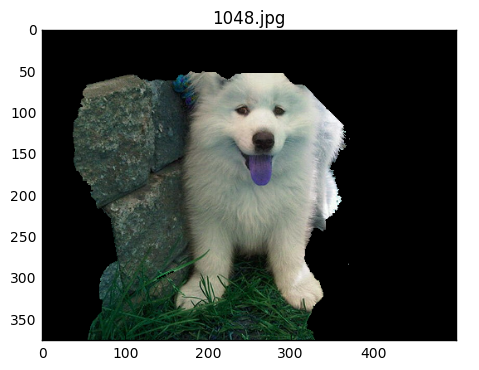

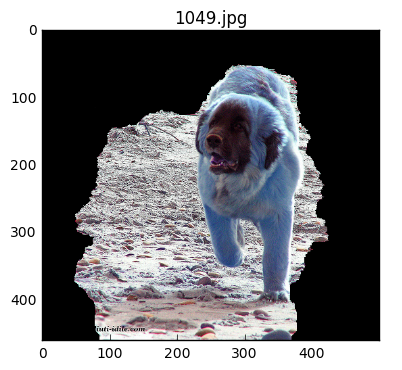

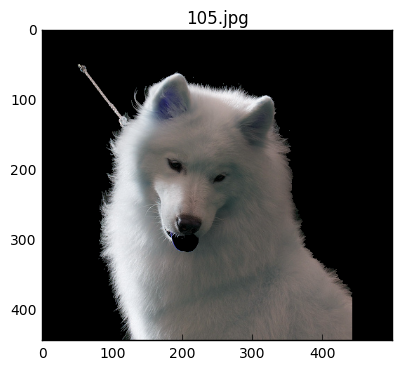

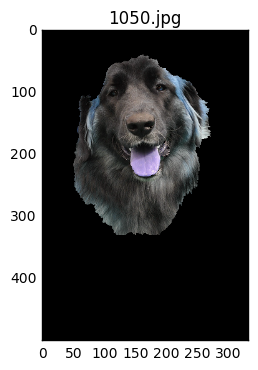

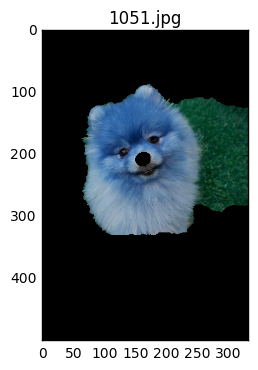

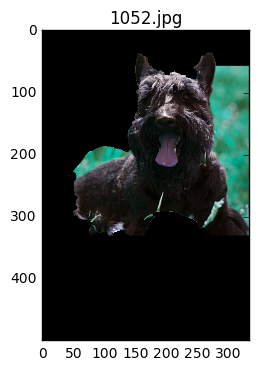

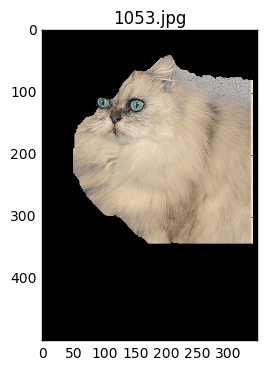

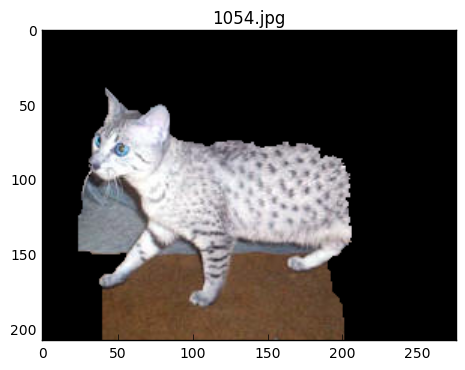

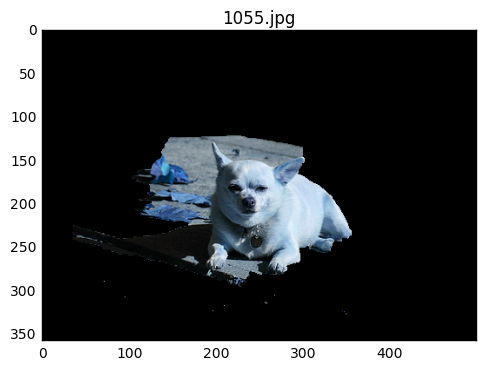

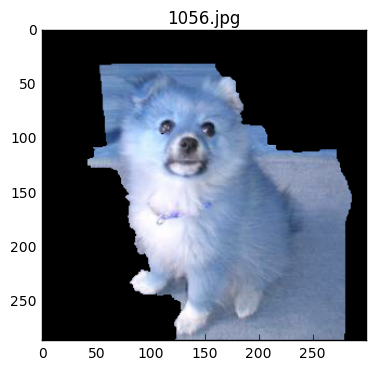

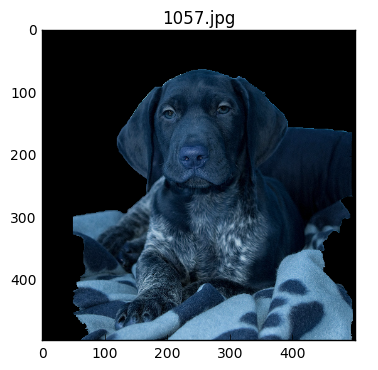

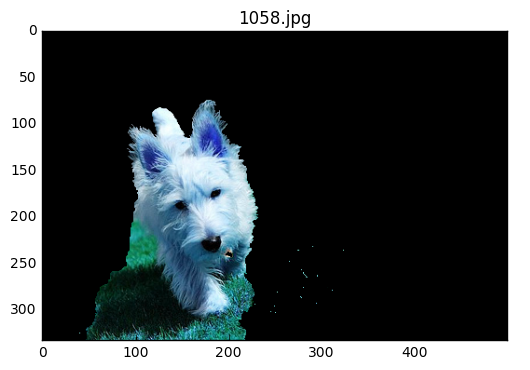

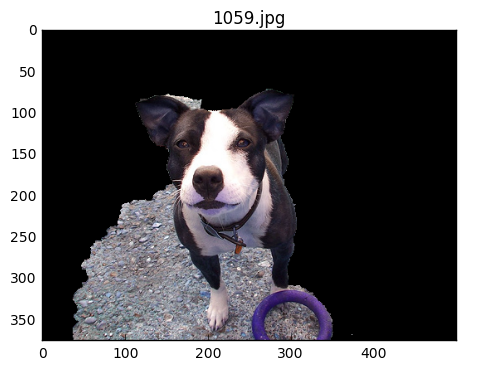

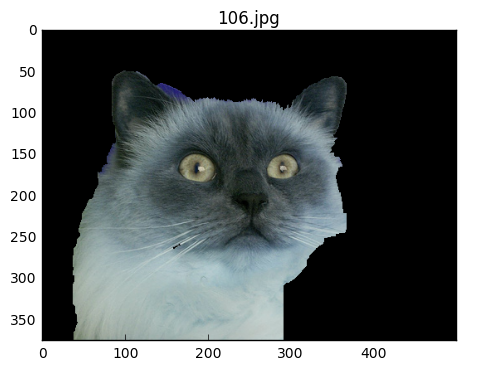

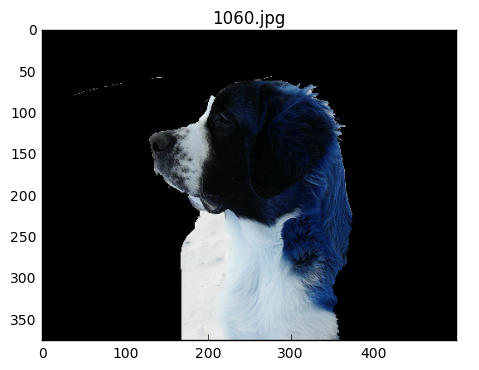

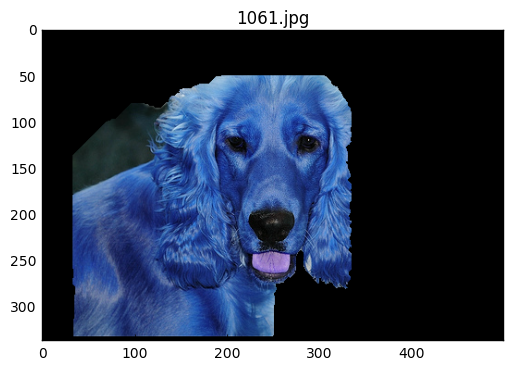

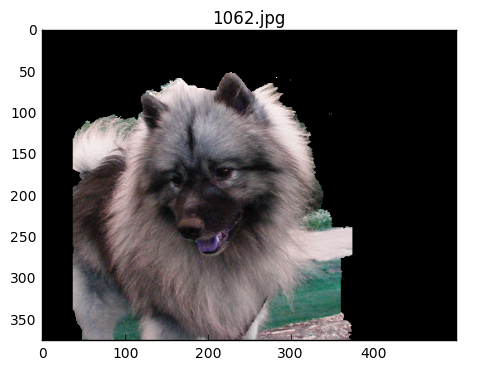

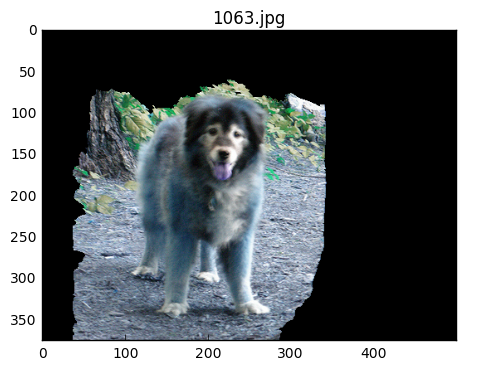

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def grabAndDetect(image):

    img = cv2.imread(image)
    
    mask = np.full(img.shape[:2],0,np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    rect = (int(img.shape[0]*0.1),int(img.shape[1]*0.1),int(img.shape[0]*0.9),int(img.shape[1]*0.9))
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, minNeighbors=5, minSize=(25, 25))
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    return img
    
rootdir = 'X_Train'

face_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_frontalcatface.xml')

for subdir, dirs, files in os.walk(rootdir):

    for file in files:
        img = grabAndDetect(rootdir + '/' + file)
        plt.imshow(img);plt.title(file)
        plt.show()